In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
# ---- Loading the data -----
files_to_process_quiet = {
    'IRKJ': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/IRKJ/irkj128-2024-05-07.Cmn', 'May 7'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/IRKJ/irkj129-2024-05-08.Cmn', 'May 8'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/IRKJ/irkj130-2024-05-09.Cmn', 'May 9')],
    'PIE1': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/PIE1/pie1128-2024-05-07.Cmn', 'May 7'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/PIE1/pie1129-2024-05-08.Cmn', 'May 8'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/PIE1/pie1130-2024-05-09.Cmn', 'May 9')],
    'SANT': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SANT/sant128-2024-05-07.Cmn', 'May 7'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SANT/sant129-2024-05-08.Cmn', 'May 8'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SANT/sant130-2024-05-09.Cmn', 'May 9')],
    'SHAO': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SHAO/shao128-2024-05-07.Cmn', 'May 7'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SHAO/shao129-2024-05-08.Cmn', 'May 8'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SHAO/shao130-2024-05-09.Cmn', 'May 9')],
    'ZECK': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZECK/zeck128-2024-05-07.Cmn', 'May 7'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZECK/zeck129-2024-05-08.Cmn', 'May 8'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZECK/zeck130-2024-05-09.Cmn', 'May 9')],
    'ZIMM': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZIMM/zimm128-2024-05-07.Cmn', 'May 7'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZIMM/zimm129-2024-05-08.Cmn', 'May 8'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZIMM/zimm130-2024-05-09.Cmn', 'May 9')],
    'ALGO': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ALGO/algo128-2024-05-07.Cmn', 'May 7'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ALGO/algo129-2024-05-08.Cmn', 'May 8'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ALGO/algo130-2024-05-09.Cmn', 'May 9')],
    'AMC4': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/AMC4/amc4128-2024-05-07.Cmn', 'May 7'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/AMC4/amc4129-2024-05-08.Cmn', 'May 8'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/AMC4/amc4130-2024-05-09.Cmn', 'May 9')],
    'CHUR': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/CHUR/chur128-2024-05-07.Cmn', 'May 7'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/CHUR/chur129-2024-05-08.Cmn', 'May 8'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/CHUR/chur130-2024-05-09.Cmn', 'May 9')]
}

files_to_process_storm = {
    'IRKJ': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/IRKJ/irkj131-2024-05-10.Cmn', 'May 10'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/IRKJ/irkj132-2024-05-11.Cmn', 'May 11'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/IRKJ/irkj133-2024-05-12.Cmn', 'May 12')],
    'PIE1': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/PIE1/pie1131-2024-05-10.Cmn', 'May 10'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/PIE1/pie1132-2024-05-11.Cmn', 'May 11'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/PIE1/pie1133-2024-05-12.Cmn', 'May 12')],
    'SANT': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SANT/sant131-2024-05-10.Cmn', 'May 10'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SANT/sant132-2024-05-11.Cmn', 'May 11'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SANT/sant133-2024-05-12.Cmn', 'May 12')],
    'SHAO': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SHAO/shao131-2024-05-10.Cmn', 'May 10'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SHAO/shao132-2024-05-11.Cmn', 'May 11'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SHAO/shao133-2024-05-12.Cmn', 'May 12')],
    'ZECK': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZECK/zeck131-2024-05-10.Cmn', 'May 10'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZECK/zeck132-2024-05-11.Cmn', 'May 11'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZECK/zeck133-2024-05-12.Cmn', 'May 12')],
    'ZIMM': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZIMM/zimm131-2024-05-10.Cmn', 'May 10'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZIMM/zimm132-2024-05-11.Cmn', 'May 11'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZIMM/zimm133-2024-05-12.Cmn', 'May 12')],
    'ALGO': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ALGO/algo131-2024-05-10.Cmn', 'May 10'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ALGO/algo132-2024-05-11.Cmn', 'May 11'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ALGO/algo133-2024-05-12.Cmn', 'May 12')],
    'AMC4': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/AMC4/amc4131-2024-05-10.Cmn', 'May 10'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/AMC4/amc4132-2024-05-11.Cmn', 'May 11'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/AMC4/amc4133-2024-05-12.Cmn', 'May 12')],
    'CHUR': [('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/CHUR/chur131-2024-05-10.Cmn', 'May 10'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/CHUR/chur132-2024-05-11.Cmn', 'May 11'), ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/CHUR/chur133-2024-05-12.Cmn', 'May 12')]
}

In [3]:
# ==============================================================================
# PART 2: LOADING AND MERGING DATA (Enhanced with better error handling)
# ==============================================================================
def load_and_merge_data(file_dict):
    """Enhanced data loading with better error handling and validation."""
    data_list = []
    for station_name, file_list in file_dict.items():
        for path, day_label in file_list:
            try:
                df = pd.read_csv(path, skiprows=4, sep='\s+')
                df = df[df['Time'] >= 0].dropna()
                df['Station'] = station_name
                df['Day'] = day_label
                data_list.append(df)
                print(f"✓ Successfully loaded {station_name} - {day_label}")
            except FileNotFoundError:
                print(f"⚠ WARNING: File not found and will be skipped: {path}")
            except Exception as e:
                print(f"✗ ERROR loading {path}: {e}")
    
    if not data_list:
        print("No data files were successfully loaded.")
        return None
    
    master_df = pd.concat(data_list, ignore_index=True)
    master_df['datetime'] = pd.to_datetime(master_df['MJdatet'], unit='D', origin='1858-11-17')
    return master_df

print("Loading quiet day data...")
quiet_df = load_and_merge_data(files_to_process_quiet)

print("\nLoading storm day data...")
storm_df = load_and_merge_data(files_to_process_storm)

Loading quiet day data...
✓ Successfully loaded IRKJ - May 7
✓ Successfully loaded IRKJ - May 8
✓ Successfully loaded IRKJ - May 9
✓ Successfully loaded PIE1 - May 7
✓ Successfully loaded PIE1 - May 8
✓ Successfully loaded PIE1 - May 9
✓ Successfully loaded SANT - May 7
✓ Successfully loaded SANT - May 8
✓ Successfully loaded SANT - May 9
✓ Successfully loaded SHAO - May 7
✓ Successfully loaded SHAO - May 8
✓ Successfully loaded SHAO - May 9
✓ Successfully loaded ZECK - May 7
✓ Successfully loaded ZECK - May 8
✓ Successfully loaded ZECK - May 9
✓ Successfully loaded ZIMM - May 7
✓ Successfully loaded ZIMM - May 8
✓ Successfully loaded ZIMM - May 9
✓ Successfully loaded ALGO - May 7
✓ Successfully loaded ALGO - May 8
✓ Successfully loaded ALGO - May 9
✓ Successfully loaded AMC4 - May 7
✓ Successfully loaded AMC4 - May 8
✓ Successfully loaded AMC4 - May 9
✓ Successfully loaded CHUR - May 7
✓ Successfully loaded CHUR - May 8
✓ Successfully loaded CHUR - May 9

Loading storm day data...
✓ 

In [4]:
# ==============================================================================
# PART 3: CALCULATE dTEC with CONSISTENT 15-MINUTE BASELINE
# ==============================================================================
dtec_df = None
if quiet_df is not None and storm_df is not None:
    print("\n" + "="*50)
    print("STATISTICAL ANALYSIS WITH 15-MINUTE BASELINE")
    print("="*50)
    
    # First, resample ALL data to 15-minute intervals for consistency
    print("Resampling all data to 15-minute intervals...")
    
    def resample_to_15min(df):
        """Resample dataframe to 15-minute intervals"""
        df_resampled = df.set_index('datetime').groupby('Station').resample('15T').agg({
            'Vtec': 'mean',
            'Day': 'first'
        }).reset_index()
        return df_resampled
    
    # Resample both quiet and storm data
    quiet_df_15min = resample_to_15min(quiet_df)
    storm_df_15min = resample_to_15min(storm_df)
    
    # Combine resampled data
    combined_df = pd.concat([quiet_df_15min, storm_df_15min], ignore_index=True)
    combined_df = combined_df.sort_values(by='datetime')
    
    # Create 15-minute time index for baseline calculation
    combined_df['time_15min'] = combined_df['datetime'].dt.floor('15T').dt.time
    
    # Calculate baseline using 15-minute intervals from quiet days
    baseline_df = quiet_df_15min.copy()
    baseline_df['time_15min'] = baseline_df['datetime'].dt.floor('15T').dt.time
    
    # Calculate mean and standard deviation for each station/15-minute interval
    quiet_stats = baseline_df.groupby(['Station', 'time_15min'])['Vtec'].agg(['mean', 'std', 'count']).reset_index()
    
    # Create pivot tables for baseline values
    quiet_15min_baseline = quiet_stats.pivot(index='time_15min', columns='Station', values='mean')
    quiet_15min_std = quiet_stats.pivot(index='time_15min', columns='Station', values='std')
    
    print(f"Baseline calculated using {len(quiet_stats)} 15-minute intervals")
    
    def get_baseline_vtec_15min(row):
        """Get baseline VTEC for given station and 15-minute time slot"""
        try:
            return quiet_15min_baseline.loc[row['time_15min'], row['Station']]
        except (KeyError, IndexError):
            return np.nan
    
    def get_baseline_std_15min(row):
        """Get baseline standard deviation for given station and 15-minute time slot"""
        try:
            return quiet_15min_std.loc[row['time_15min'], row['Station']]
        except (KeyError, IndexError):
            return np.nan
    
    # Calculate dTEC with 15-minute baseline
    combined_df['quiet_avg_vtec'] = combined_df.apply(get_baseline_vtec_15min, axis=1)
    combined_df['quiet_std_vtec'] = combined_df.apply(get_baseline_std_15min, axis=1)
    combined_df['dTEC_percent'] = ((combined_df['Vtec'] - combined_df['quiet_avg_vtec']) / combined_df['quiet_avg_vtec']) * 100
    combined_df['dTEC_sigma'] = combined_df['dTEC_percent'] / (combined_df['quiet_std_vtec'] / combined_df['quiet_avg_vtec'] * 100)
    
    dtec_df = combined_df.dropna(subset=['dTEC_percent'])
    
    print(f"Total data points: {len(dtec_df)}")
    print(f"Stations analyzed: {dtec_df['Station'].nunique()}")
    print(f"Date range: {dtec_df['datetime'].min()} to {dtec_df['datetime'].max()}")
    print(f"Average data points per station: {len(dtec_df) / dtec_df['Station'].nunique():.1f}")
    
else:
    print("\n✗ Could not calculate dTEC because quiet or storm data is missing.")


STATISTICAL ANALYSIS WITH 15-MINUTE BASELINE
Resampling all data to 15-minute intervals...
Baseline calculated using 864 15-minute intervals
Total data points: 5184
Stations analyzed: 9
Date range: 2024-05-07 00:00:00 to 2024-05-12 23:45:00
Average data points per station: 576.0



GENERATING ENHANCED PUBLICATION-READY PLOTS
✓ Corrected plots saved as 'corrected_dTEC_variation_15min.pdf'

SUMMARY STATISTICS (15-MINUTE BASELINE)
         count   mean    std    min     max
Station                                    
ALGO       576 -11.82  28.94 -80.05   52.99
AMC4       576  -3.83  31.16 -71.64  124.99
CHUR       576 -10.22  20.67 -60.01   27.31
IRKJ       576  -5.27  21.37 -76.20   47.35
PIE1       576  -0.63  35.62 -72.03  157.11
SANT       576  23.66  88.85 -48.46  765.19
SHAO       576  -1.18  51.84 -76.00  420.62
ZECK       576  -1.67  30.10 -61.05  194.27
ZIMM       576   9.82  38.55 -53.90  185.12

Temporal Resolution Information:
- Total 15-minute intervals: 5184
- Time span: 143.8 hours
- Average intervals per station: 576.0


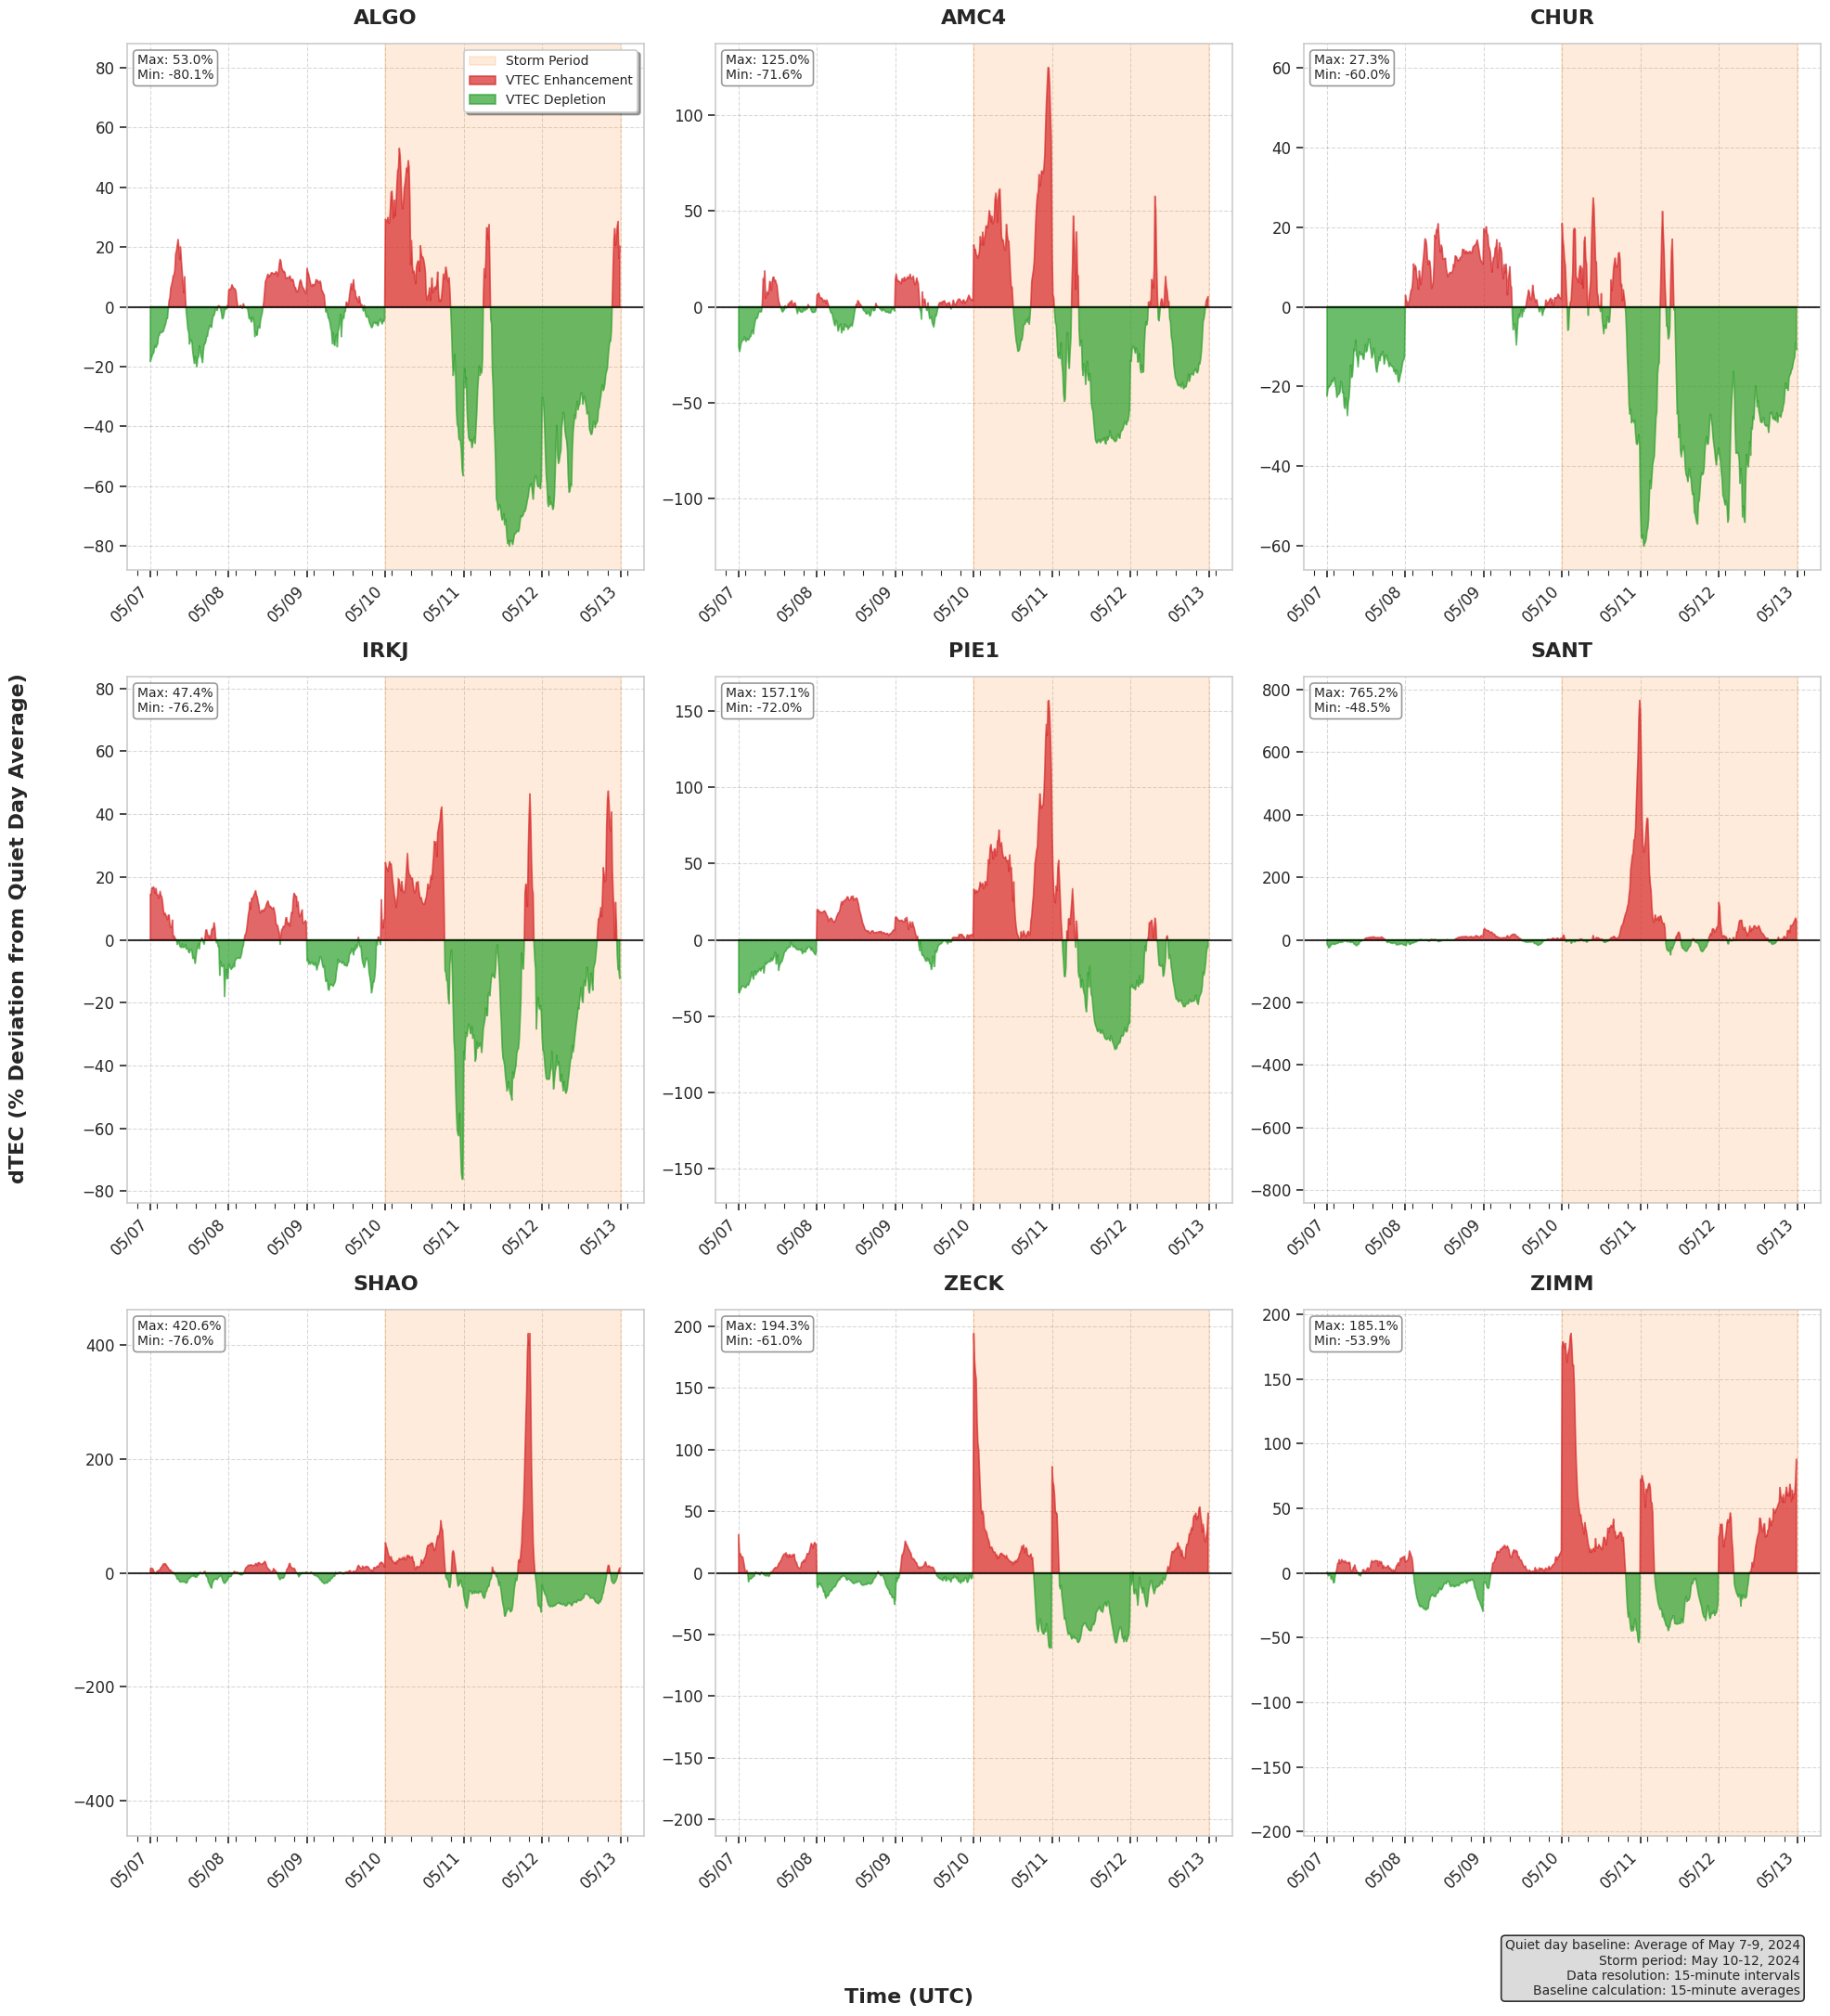

In [6]:
# ==============================================================================
# PART 4: PLOTTING THE CALCULATED dTEC VALUES FOR DIFFERENT STATIONS
# ==============================================================================
# Set scientific plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Enhanced color scheme for scientific publications
colors = {
    'enhancement': '#d62728',  # Red for positive dTEC
    'depletion': '#2ca02c',    # Green for negative dTEC
    'baseline': '#1f77b4',     # Blue for reference
    'storm_period': '#ff7f0e', # Orange for storm highlighting
    'quiet_period': '#9467bd'  # Purple for quiet period
}
if dtec_df is not None and not dtec_df.empty:
    print("\n" + "="*50)
    print("GENERATING ENHANCED PUBLICATION-READY PLOTS")
    print("="*50)
    
    # Configure matplotlib for publication quality
    plt.rcParams.update({
        'font.size': 12,
        'font.family': 'DejaVu Sans',
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'figure.titlesize': 18,
        'axes.linewidth': 1.2,
        'grid.linewidth': 0.8,
        'lines.linewidth': 2,
        'patch.linewidth': 1.2,
        'xtick.major.width': 1.2,
        'ytick.major.width': 1.2,
        'xtick.minor.width': 0.8,
        'ytick.minor.width': 0.8,
        'xtick.major.size': 6,
        'ytick.major.size': 6,
        'xtick.minor.size': 4,
        'ytick.minor.size': 4,
    })
    
    stations_to_plot = sorted(dtec_df['Station'].unique())
    
    # Create the main figure with enhanced layout
    fig = plt.figure(figsize=(20, 24))
    
    # Define storm period for highlighting
    storm_start = pd.to_datetime('2024-05-10')
    storm_end = pd.to_datetime('2024-05-12 23:59:59')
    
    # Create subplots with proper spacing
    for i, station_name in enumerate(stations_to_plot):
        ax = plt.subplot(3, 3, i+1)
        
        # Get station data (already in 15-minute intervals)
        station_dtec_df = dtec_df[dtec_df['Station'] == station_name].copy()
        station_dtec_df = station_dtec_df.sort_values('datetime')
        
        # No need to resample - data is already in 15-minute intervals
        dtec_series = station_dtec_df.set_index('datetime')['dTEC_percent']
        
        # Add storm period background
        ax.axvspan(storm_start, storm_end, alpha=0.15, color=colors['storm_period'], 
                  label='Storm Period' if i == 0 else "")
        
        # Plot positive and negative variations with enhanced styling
        positive_mask = dtec_series >= 0
        negative_mask = dtec_series < 0
        
        # Fill areas for positive and negative deviations
        ax.fill_between(dtec_series.index, dtec_series.values, 0, 
                       where=positive_mask, color=colors['enhancement'], 
                       alpha=0.7, interpolate=True, label='VTEC Enhancement' if i == 0 else "")
        
        ax.fill_between(dtec_series.index, dtec_series.values, 0, 
                       where=negative_mask, color=colors['depletion'], 
                       alpha=0.7, interpolate=True, label='VTEC Depletion' if i == 0 else "")
        
        # Add zero reference line
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.8)
        
        # Enhanced title with station name
        ax.set_title(f'{station_name}', fontsize=16, fontweight='bold', pad=15)
        
        # Enhanced grid
        ax.grid(True, linestyle='--', alpha=0.3, color='gray')
        ax.set_axisbelow(True)
        
        # Statistical annotations
        max_enhancement = dtec_series.max()
        max_depletion = dtec_series.min()
        
        # Add statistical text box
        textstr = f'Max: {max_enhancement:.1f}%\nMin: {max_depletion:.1f}%'
        props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
        ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
        
        # Enhanced axis formatting
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.tick_params(axis='both', which='minor', labelsize=10)
        
        # Format x-axis for better date display
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
        ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))
        
        # Rotate x-axis labels for better readability
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        # Set y-axis limits for consistency
        y_max = max(abs(dtec_series.max()), abs(dtec_series.min()))
        ax.set_ylim(-y_max*1.1, y_max*1.1)
        
        # IMPROVED LEGEND POSITIONING - Only add to the first subplot
        if i == 0:
            # Option 1: Higher position in upper right
            ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, 
                     bbox_to_anchor=(1.0, 1.0), fontsize=10)
            
            # Option 2: Alternative positions you can try:
            # ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True, fontsize=10)
            # ax.legend(loc='upper center', frameon=True, fancybox=True, shadow=True, 
            #          bbox_to_anchor=(0.5, 1.0), fontsize=10)
            # ax.legend(loc='best', frameon=True, fancybox=True, shadow=True, fontsize=10)
        
    # Add common x and y labels
    fig.text(0.5, 0.02, 'Time (UTC)', ha='center', va='center', fontsize=16, fontweight='bold')
    fig.text(0.02, 0.5, 'dTEC (% Deviation from Quiet Day Average)', ha='center', va='center', 
             rotation='vertical', fontsize=16, fontweight='bold')
    
    # Add methodology note with corrected information
    methodology_text = ('Quiet day baseline: Average of May 7-9, 2024\n'
                       'Storm period: May 10-12, 2024\n'
                       'Data resolution: 15-minute intervals\n'
                       'Baseline calculation: 15-minute averages')
    fig.text(0.98, 0.02, methodology_text, ha='right', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0.04, 0.06, 1, 0.92])
    
    # Save high-resolution figure suitable for publication
    plt.savefig('/home/akash/Desktop/VTEC-May-2024-Final-Year-Project-2025-/PLOTS/corrected_dTEC_variation_15min.pdf', dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    
    print("✓ Corrected plots saved as 'corrected_dTEC_variation_15min.pdf'")
    
    # Create a summary statistics table
    print("\n" + "="*50)
    print("SUMMARY STATISTICS (15-MINUTE BASELINE)")
    print("="*50)
    
    summary_stats = dtec_df.groupby('Station')['dTEC_percent'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(2)
    
    print(summary_stats)
    
    # Print temporal resolution information
    print(f"\nTemporal Resolution Information:")
    print(f"- Total 15-minute intervals: {len(dtec_df)}")
    print(f"- Time span: {(dtec_df['datetime'].max() - dtec_df['datetime'].min()).total_seconds() / 3600:.1f} hours")
    print(f"- Average intervals per station: {len(dtec_df) / dtec_df['Station'].nunique():.1f}")
    
    plt.show()
    
else:
    print("\n✗ No valid dTEC data to plot.")